In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
chicago_crime_data = pd.read_csv('C:\\Users\\User\\OneDrive\\DHBW\\Erste Semester\\Introduction to Data Science\\DataScienceProjekt\\Python_Programm\\Crimes_-_2001_to_Present.csv')

In [20]:
print('chicago_crime_data hat',chicago_crime_data.shape[1],'spalten und',chicago_crime_data.shape[0],'zeilen.' )

chicago_crime_data hat 22 spalten und 7921843 zeilen.


In [21]:
chicago_crime_data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11037294,JA371270,03/18/2015 12:00:00 PM,0000X W WACKER DR,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,BANK,False,False,...,42.0,32.0,11,NaN,NaN,2015,08/01/2017 03:52:26 PM,NaN,NaN,NaN
1,11646293,JC213749,12/20/2018 03:00:00 PM,023XX N LOCKWOOD AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,...,36.0,19.0,11,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,15.0,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,11645959,JC211511,12/20/2018 04:00:00 PM,045XX N ALBANY AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,...,33.0,14.0,08A,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
4,11645601,JC212935,06/01/2014 12:01:00 AM,087XX S SANGAMON ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,21.0,71.0,11,NaN,NaN,2014,04/06/2019 04:04:43 PM,NaN,NaN,NaN


## Input Variable:
- Case Number
## Output Variablen:
- Block
- Primary Type
- Description

In [22]:
print('Fast alle Variablen sind Nominal skaliert')
print('Die Variablen Arrest und Domestic sind Ordinal')

Fast alle Variablen sind Nominal skaliert
Die Variablen Arrest und Domestic sind Ordinal


In [26]:
chicago_crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7921843 entries, 0 to 7921842
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

In [30]:
null_daten_count = chicago_crime_data.isnull().sum()
print(null_daten_count)

ID                           0
Case Number                  0
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description     11963
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614853
Community Area          613477
FBI Code                     0
X Coordinate             90240
Y Coordinate             90240
Year                         0
Updated On                   0
Latitude                 90240
Longitude                90240
Location                 90240
dtype: int64


In [32]:
pd.set_option('display.float_format', '{:.2f}'.format)
chicago_crime_data.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,7921843.00,7921843.00,7921796.00,7306990.00,7308366.00,7831603.00,7831603.00,7921843.00,7831603.00,7831603.00
mean,7131825.06,1185.40,11.30,22.76,37.46,1164613.54,1885811.59,2010.17,41.84,-87.67
std,3562924.36,703.32,6.96,13.85,21.54,16842.48,32273.76,6.43,0.09,0.06
min,634.00,111.00,1.00,1.00,0.00,0.00,0.00,2001.00,36.62,-91.69
25%,3843452.50,621.00,6.00,10.00,23.00,1152996.00,1859100.00,2005.00,41.77,-87.71
50%,7130516.00,1034.00,10.00,23.00,32.00,1166135.00,1890754.00,2009.00,41.86,-87.67
75%,10304795.50,1731.00,17.00,34.00,57.00,1176389.00,1909305.00,2015.00,41.91,-87.63
max,13257461.00,2535.00,31.00,50.00,77.00,1205119.00,1951622.00,2023.00,42.02,-87.52


In [34]:
chicago_crime_data_numeric = chicago_crime_data.select_dtypes(include=[float, int])

In [35]:
correlation_matrix = chicago_crime_data_numeric.corr()

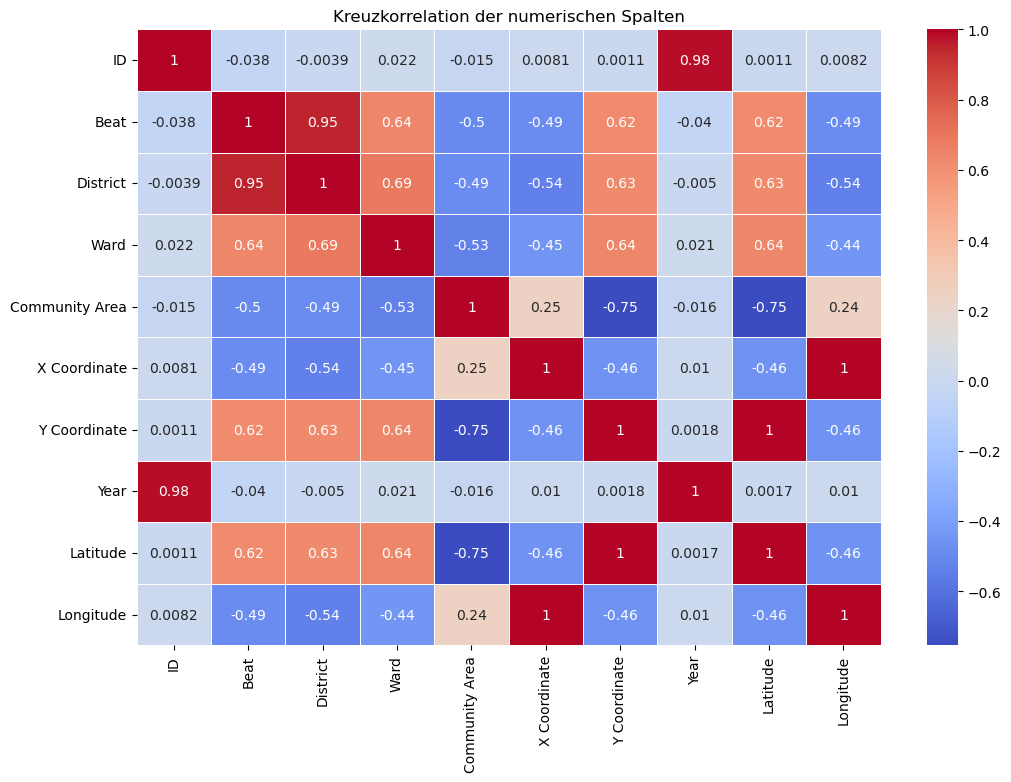

In [36]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Kreuzkorrelation der numerischen Spalten')
plt.show()